<h1 style='color: green'> Naive Bayes Algorithm</h1>

### Introduction

Naive Bayes is among one of the very simple and powerful algorithms for classification based on Bayes Theorem with an assumption of independence among the predictors. The Naive Bayes classifier assumes that the presence of a feature in a class is not related to any other feature. Naive Bayes is a classification algorithm for binary and multi-class classification problems.

#### Characterstics

<ul>
<li>The Naive Bayes method makes the assumption that the predictors contribute equally and independently to selecting the output class.</li>
<li>Although the Naive Bayes model’s assumption that all predictors are independent of one another is unfeasible in real-world circumstances, this assumption produces a satisfactory outcome in the majority of instances.</li>
<li>Naive Bayes is often used for text categorization since the dimensionality of the data is frequently rather large.</li>
</ul>

### Steps

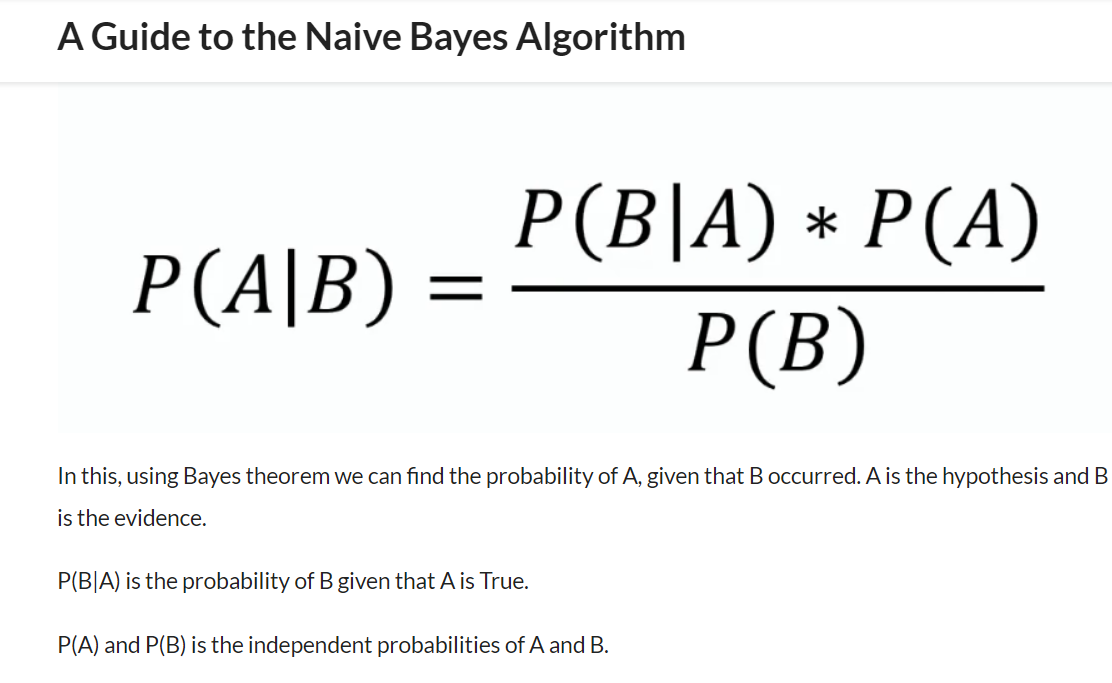

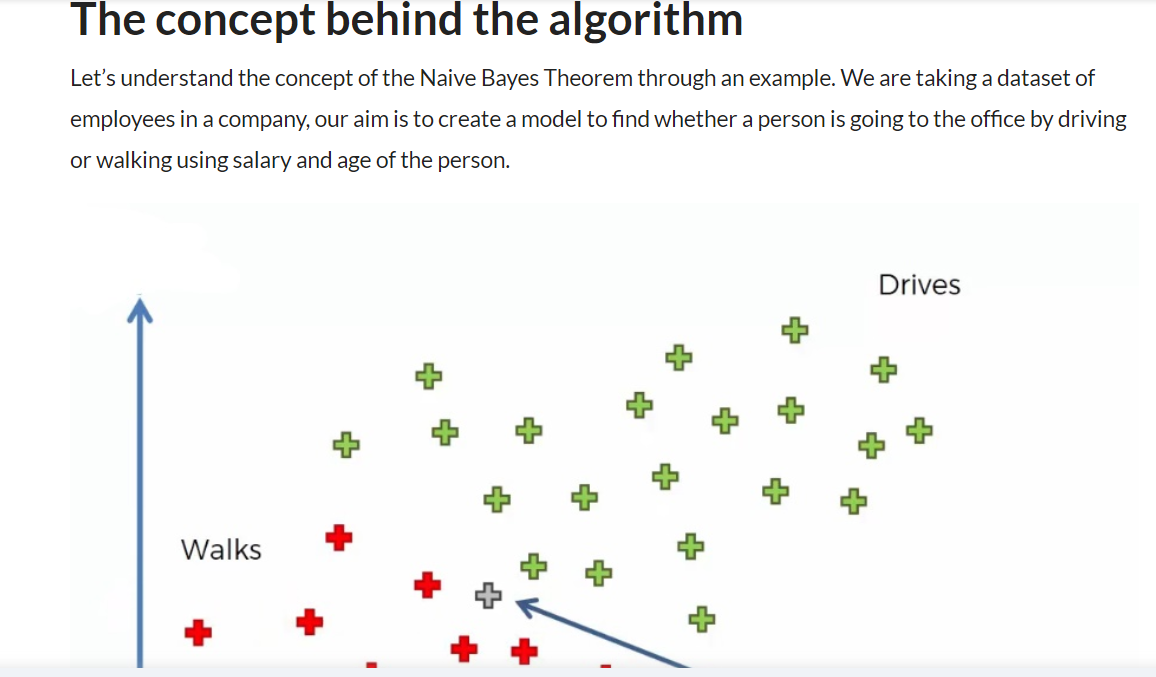

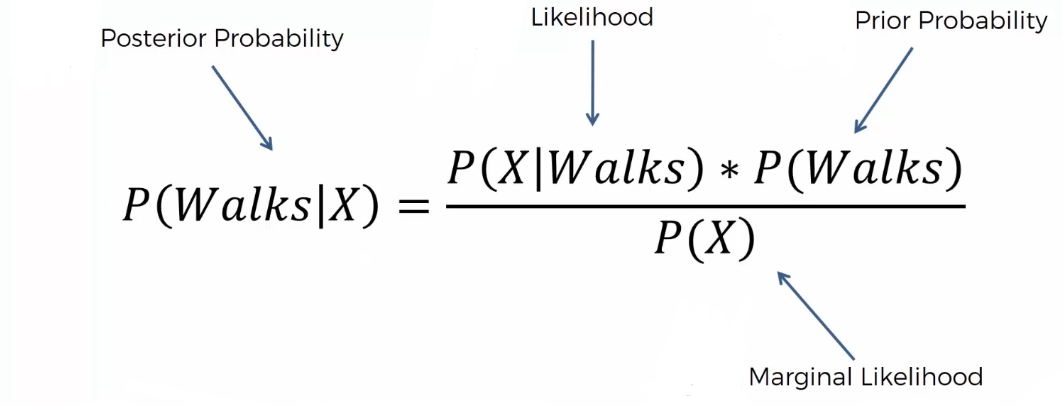

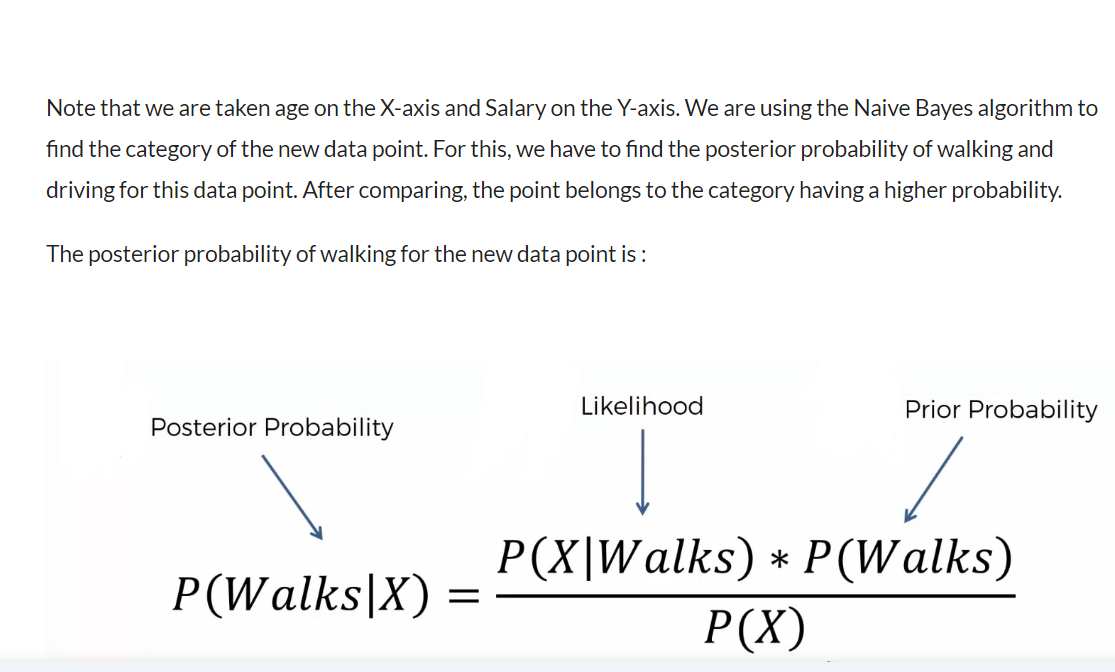

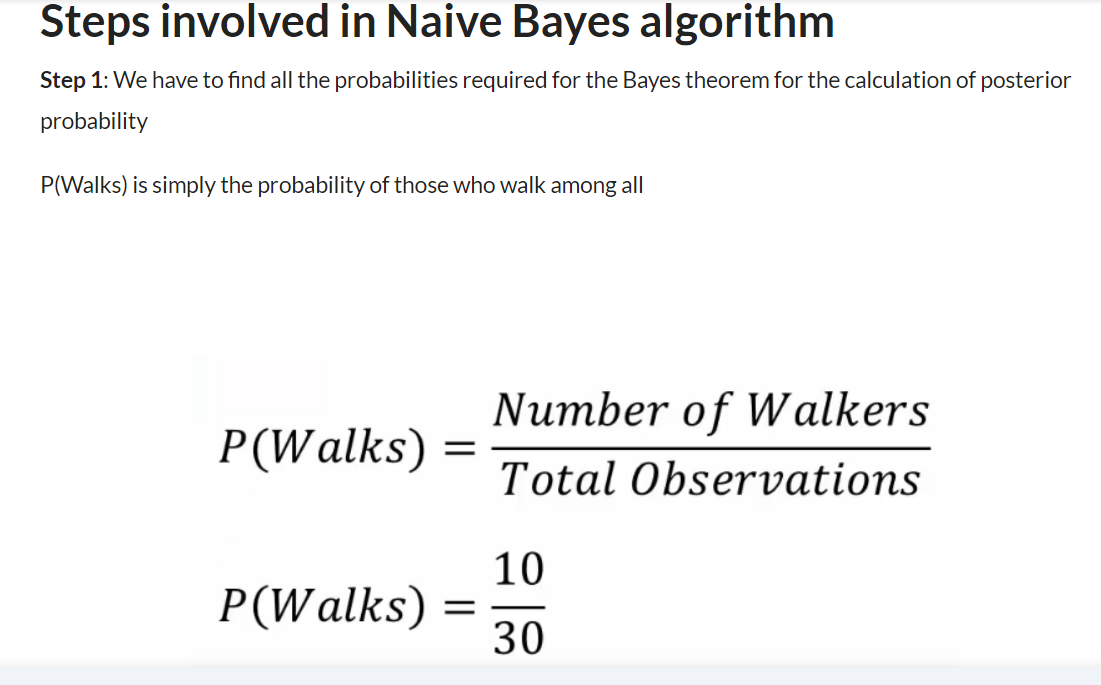

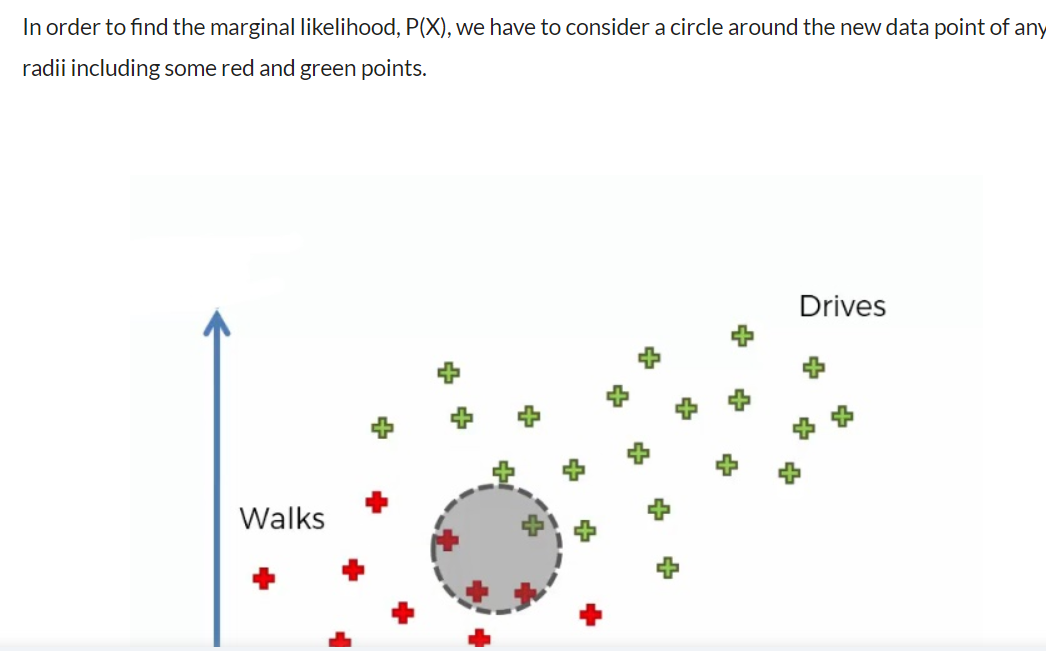

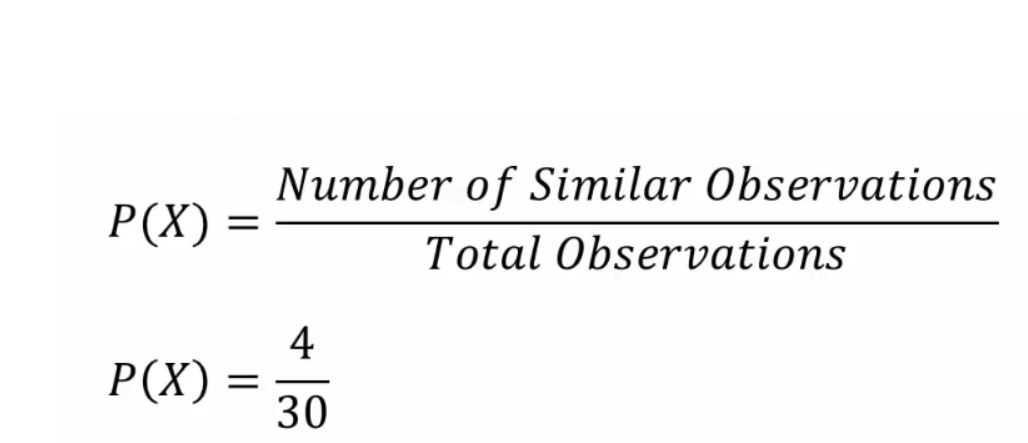

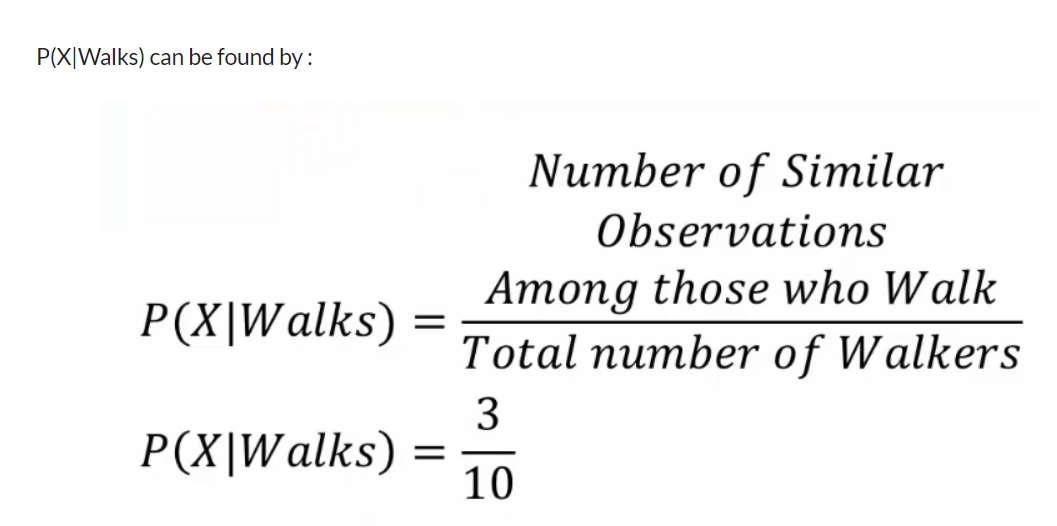

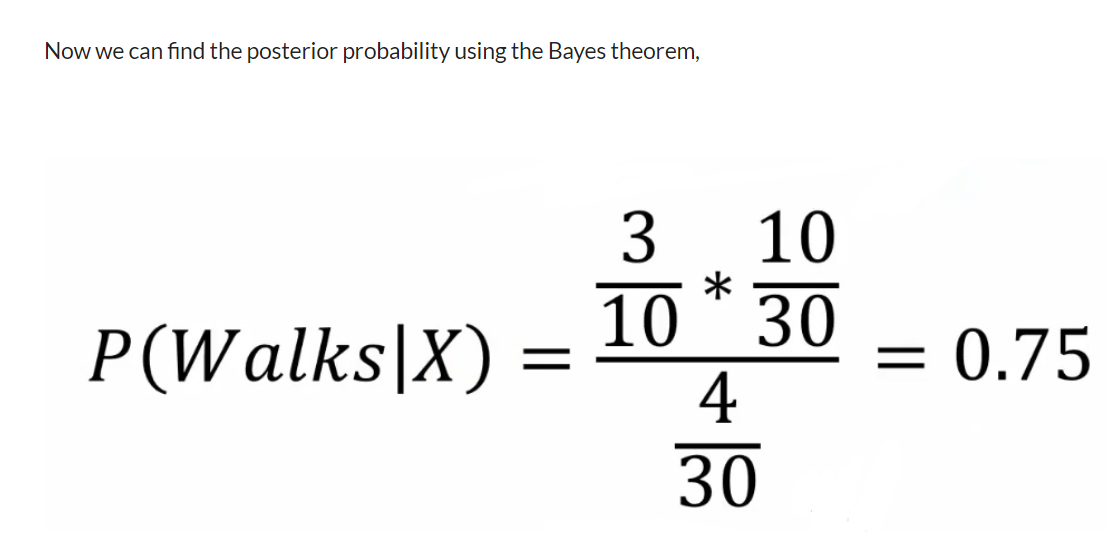

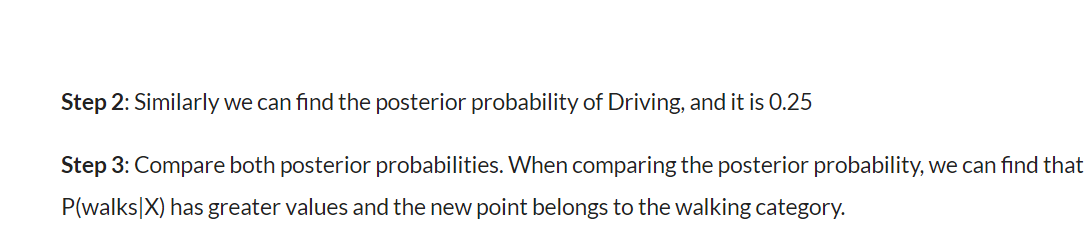

## Implementation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# load dataset
ds=pd.read_csv('Social_Network_Ads.csv')
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# since our gender data is character variable so we have to labelcode it
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
ds['Gender'] = le.fit_transform(ds['Gender'])
ds.head(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [6]:
X = ds.iloc[:, [2, 3]].values# all rows with column 3 and 4 ie: age ,estimated salary
y = ds.iloc[:, -1].values#all rows with last column ie: purchased

In [7]:
# spliting our data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)


In [8]:
#Next, we are doing feature scaling to the training and test set of independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# printing
print("X_train",X_train)
print("y_train",y_train)
print("X_test",X_test)
print("y_test",y_test)

X_train [[ 0.5118008   1.80675605]
 [-0.24032896  0.09003827]
 [ 0.13573592 -0.79693258]
 [-1.27450738 -1.08305221]
 [ 0.32376836  0.06142631]
 [ 0.22975214  0.03281435]
 [ 0.32376836 -1.14027614]
 [ 1.07589811 -0.88276847]
 [-0.24032896 -1.34055988]
 [ 0.41778458  0.57644164]
 [-1.74458847  0.43338183]
 [ 0.41778458 -0.45358903]
 [ 0.69983323  1.74953213]
 [ 1.54597921 -1.25472399]
 [-0.33434518  0.06142631]
 [ 0.32376836  0.26171005]
 [-1.27450738 -1.45500773]
 [-0.05229652  0.26171005]
 [-1.83860469  0.46199379]
 [-0.8984425  -0.31052921]
 [ 0.60581701  1.97842783]
 [-0.71041006 -0.22469332]
 [ 0.22975214 -0.36775314]
 [-0.14631274  1.37757661]
 [-0.8984425  -0.9399924 ]
 [ 1.16991433 -0.73970866]
 [-1.83860469 -0.05302154]
 [-0.80442628  0.29032201]
 [ 0.32376836  0.06142631]
 [-0.14631274  2.12148765]
 [ 1.92204409 -0.91138043]
 [-1.27450738 -0.42497706]
 [-0.71041006 -0.59664884]
 [-1.08647494 -0.76832062]
 [-1.3685236  -0.11024547]
 [ 0.98188189  2.03565176]
 [-0.80442628  0.147

In [10]:
# Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classify = GaussianNB()
classify.fit(X_train, y_train)

GaussianNB()

In [11]:
# Let’s predict the test results
y_pred  =  classify.predict(X_test)
# comparing true and predicted value
print("y_test",y_test)
print("y_pred",y_pred)

y_test [1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 1 0 1 0 0]
y_pred [1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 0 1 0 0]


In [12]:
# We can evaluate our matrix using the confusion matrix and,
#accuracy score by comparing the predicted and actual test values
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("confusion matrix : ",cm)
print("accuracy score : ",ac)

confusion matrix :  [[51  3]
 [ 2 24]]
accuracy score :  0.9375


Accuracy is good. Note that, you can achieve better results for this problem using different algorithms.

In [13]:
# now generating final classification report
from sklearn.metrics import classification_report
c_report=classification_report(y_test,y_pred)
print("report:",c_report)

report:               precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.89      0.92      0.91        26

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



### now we do cross validation for our classification

In [14]:
# import k-folder
from sklearn.model_selection import cross_val_score
# use the same model as before
classify = GaussianNB()
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(classify, X, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)

[0.825  0.9625 0.925  0.8125 0.9   ]


In [15]:
# then I will do the average about these five scores to get more accuracy score.
print("accuracy : ",scores.mean())

accuracy :  0.8850000000000001
